# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.055980e+01     6.169757e+00
 * time: 0.006988048553466797
     1     2.777540e+01     5.234964e+00
 * time: 0.03317403793334961
     2     2.048681e+01     7.021428e+00
 * time: 0.06522893905639648
     3     1.418884e+01     4.612251e+00
 * time: 0.2268369197845459
     4     1.082085e+01     1.377760e+00
 * time: 0.25716304779052734
     5     9.955684e+00     2.168019e+00
 * time: 0.2814960479736328
     6     9.436551e+00     1.137054e+00
 * time: 0.3055849075317383
     7     9.034080e+00     1.020615e+00
 * time: 0.3296828269958496
     8     8.748169e+00     1.137034e+00
 * time: 0.35367298126220703
     9     8.556143e+00     8.792688e-01
 * time: 0.37792396545410156
    10     8.425747e+00     6.993769e-01
 * time: 0.40183401107788086
    11     8.262793e+00     6.305859e-01
 * time: 0.4258408546447754
    12     8.131116e+00     4.662550e-01
 * time: 0.4495408535003662
    13     8.081246e+00     6.877486e-01
 * time: 0.46

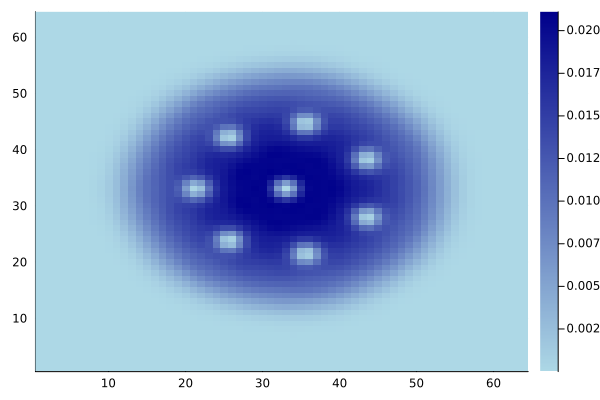

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)